# Enviroment setup

In [1]:
! pip install -r requirements.txt --quiet

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
autogluon-multimodal 1.2 requires nvidia-ml-py3==7.352.0, which is not installed.
autogluon-multimodal 1.2 requires jsonschema<4.22,>=4.18, but you have jsonschema 4.23.0 which is incompatible.
autogluon-multimodal 1.2 requires nltk<3.9,>=3.4.5, but you have nltk 3.9.1 which is incompatible.
autogluon-multimodal 1.2 requires omegaconf<2.3.0,>=2.1.1, but you have omegaconf 2.3.0 which is incompatible.
pathos 0.3.3 requires dill>=0.3.9, but you have dill 0.3.8 which is incompatible.
pathos 0.3.3 requires multiprocess>=0.70.17, but you have multiprocess 0.70.16 which is incompatible.


In [2]:
import yaml

with open("config/config.yaml", "r") as f:
    config = yaml.safe_load(f)

explicit_path = config["explicit_data_path"]
implicit_path = config["implicit_data_path"]
explicit_bleurt = config["explicit_bleurt"]
implicit_bleurt = config["implicit_bleurt"]
token = config["token"]


## Wilcoxon Test

A p-value is a statistical measurement used to validate a hypothesis against observed data.
A p-value measures the probability of obtaining the observed results, assuming that the null hypothesis is true.
The lower the p-value, the greater the statistical significance of the observed difference.
A p-value of 0.05 or lower is generally considered statistically significant.
P-value can serve as an alternative to—or in addition to—preselected confidence levels for hypothesis testing.

In [3]:
import pandas as pd
import configparser

df_explicit = pd.read_csv(explicit_bleurt)
print(df_explicit.head())
df_implicit = pd.read_csv(implicit_bleurt)
print(df_implicit.head())

          id        answer property_value  bleurt_score
0    Q645627         actor          actor      0.576798
1   Q5251048   dj producer    dj producer      0.928611
2  Q20993896      tom hank       tom hank      0.973925
3   Q6777518         actor          actor      0.576798
4    Q241867  united state   united state      0.991983
          id       answer property_value  bleurt_score
0    Q645627          NaN          actor      0.025011
1   Q5251048  dj producer    dj producer      0.928611
2  Q20993896          NaN       tom hank      0.006566
3   Q6777518        actor          actor      0.576798
4    Q241867          NaN   united state      0.021853


In [18]:
unique_answers_count_exp = df_explicit["answer"].nunique()

unique_answers_count_imp = df_implicit["answer"].nunique()
print(f"Total unique answers exp: {unique_answers_count_exp}, total unique asnw impl: {unique_answers_count_imp}")

property_value_counts = df_explicit["property_value"].value_counts()
answer_counts_ex = df_explicit["answer"].value_counts()
answer_counts_imp = df_implicit["answer"].value_counts()
print(property_value_counts.head())
print("--------------------------")
print(answer_counts_ex.head())
print("--------------------------")
print(answer_counts_imp.head())

actress_count = property_value_counts.get("actress", 0)
print(f"Number of 'actress' property values: {actress_count}")

Total unique answers exp: 4840, total unique asnw impl: 3561
property_value
actor               1037
united state         727
film actor           449
television actor     416
united kingdom       241
Name: count, dtype: int64
--------------------------
answer
united state        726
actor               697
actres              371
film actor          328
television actor    307
Name: count, dtype: int64
--------------------------
answer
actor             986
united state      424
actres            304
film actor        300
united kingdom    193
Name: count, dtype: int64
Number of 'actress' property values: 0


In [19]:
property_value_counts = df_implicit["property_value"].value_counts()
answer_counts = df_implicit["answer"].value_counts()
print(property_value_counts.head())
print("--------------------------")
print(answer_counts.head())

property_value
actor               1037
united state         727
film actor           449
television actor     416
united kingdom       241
Name: count, dtype: int64
--------------------------
answer
actor             986
united state      424
actres            304
film actor        300
united kingdom    193
Name: count, dtype: int64


In [20]:
explicit_nan_count = df_explicit["answer"].isna().sum()
print(f"Number of NaN values in 'answer' (Explicit case): {explicit_nan_count}, Percentage: {explicit_nan_count / len(df_explicit) * 100:.2f}")
implicit_nan_count = df_implicit["answer"].isna().sum()
print(f"Number of NaN values in 'answer' (Implicit case): {implicit_nan_count},  Percentage: {implicit_nan_count / len(df_implicit) * 100:.2f}")

Number of NaN values in 'answer' (Explicit case): 130, Percentage: 1.30
Number of NaN values in 'answer' (Implicit case): 1460,  Percentage: 14.60


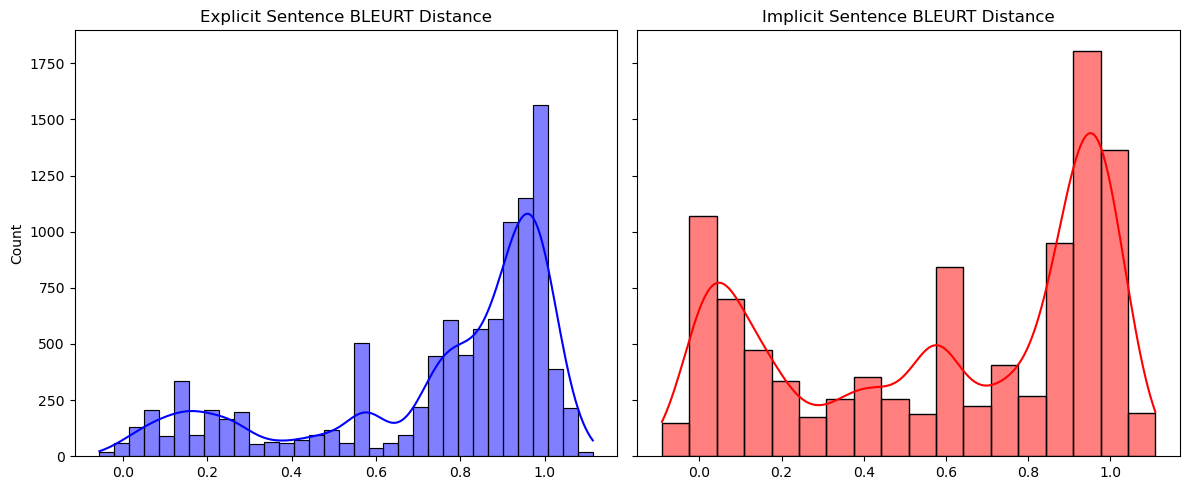

Stats: 2513070.0, pvalue 2.8875517629506923e-267
It's statistically significant


In [23]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import scipy.stats as stats
import numpy as np

warnings.simplefilter(action='ignore', category=FutureWarning)

#Convert to numerical values where necessary
explicit_distance = df_explicit["bleurt_score"].astype(float).values
implicit_distance = df_implicit["bleurt_score"].astype(float).values

# plotto tutte e due le distanze per controllare che non siano distribuzioni normali
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)  # 1 row, 2 columns

sns.histplot(data=explicit_distance, ax=axes[0], kde=True, color="blue")
axes[0].set_title("Explicit Sentence BLEURT Distance")

sns.histplot(data=implicit_distance, ax=axes[1], kde=True, color="red")
axes[1].set_title("Implicit Sentence BLEURT Distance")

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

stats, pvalue = stats.wilcoxon(explicit_distance, implicit_distance, alternative='two-sided') #"greater"
print(f"Stats: {stats}, pvalue {pvalue}")

if(pvalue < 0.05):
    print("It's statistically significant")
else:
    print("It's not statistically significant")

# Dataset
Dataset overview

In [4]:
import pandas as pd
df_explicit = pd.read_csv(explicit_path)
df_explicit.head()

,id,entity_name,original_text,question,answer,selected_property,property_value
0,Q645627,Hal Mohr,Hal Mohr was born in San Francisco on August 2...,What does Hal Mohr do for a living?,actor,occupation,actor
1,Q5251048,Def Jef,"Jeff Fortson, born on September 27, 1966, in H...",What does Def Jef do for a living?,DJ producer,occupation,DJ producer
2,Q20993896,Truman Hanks,"Truman Hanks, born on December 26, 1995, in Lo...",Who is Truman Hanks's father?,Tom Hanks,father,Tom Hanks
3,Q6777518,Marty Papazian,"Marty Papazian was born on April 18, 1976, in ...",What does Marty Papazian do for a living?,actor,occupation,actor
4,Q241867,Alexis Dziena,"Alexis Dziena, born on July 8, 1984, in New Yo...",What country is Alexis Dziena a citizen of?,United States,country of citizenship,United States


In [26]:
df_explicit[df_explicit["selected_property"] == "occupation"]

,id,entity_name,original_text,question,answer,selected_property,property_value
0,Q645627,Hal Mohr,Hal Mohr was born in San Francisco on August 2...,What does Hal Mohr do for a living?,actor,occupation,actor
1,Q5251048,Def Jef,"Jeff Fortson, born on September 27, 1966, in H...",What does Def Jef do for a living?,DJ producer,occupation,DJ producer
3,Q6777518,Marty Papazian,"Marty Papazian was born on April 18, 1976, in ...",What does Marty Papazian do for a living?,actor,occupation,actor
7,Q298761,Clive Barker,"Clive Barker, born on October 5, 1952, in Live...",What does Clive Barker do for a living?,film producer,occupation,film producer
8,Q5957724,Farhad Ayish,"Farhad, born on September 18, 1952, in Shemira...",What does Farhad Ayish do for a living?,film director,occupation,film director
...,...,...,...,...,...,...,...
9962,Q445146,Desmond Harrington,"Desmond Harrington, born on October 19, 1976, ...",What does Desmond Harrington do for a living?,actor,occupation,film actor
9965,Q434901,Lionel Belmore,Lionel Belmore was a prominent figure in the e...,What does Lionel Belmore do for a living?,film actor,occupation,film actor
9967,Q4909746,Bill Kirchenbauer,"Bill was born on February 19, 1953, in Salzbur...",What does Bill Kirchenbauer do for a living?,television actor,occupation,actor
9987,Q240162,Stephanie Seymour,"Stephanie Michelle Seymour, born on July 23, 1...",What does Stephanie Seymour do for a living?,actress and model,occupation,television actor


In [27]:
import pandas as pd
df_implicit = pd.read_csv(implicit_path)
df_implicit.head()
df_implicit[df_implicit["selected_property"] == "occupation"]

,id,entity_name,original_text,question,answer,selected_property,property_value
0,Q645627,Hal Mohr,"Hal Mohr, born in San Francisco in 1894, left ...",What does Hal Mohr do for a living?,NaN,occupation,actor
1,Q5251048,Def Jef,"Born in Harlem on September 27, 1966, Jeffrey ...",What does Def Jef do for a living?,DJ producer,occupation,DJ producer
3,Q6777518,Marty Papazian,"Marty Papazian, born in Los Angeles on April 1...",What does Marty Papazian do for a living?,actor,occupation,actor
7,Q298761,Clive Barker,"Clive Barker, born in Liverpool on October 5, ...",What does Clive Barker do for a living?,author and film producer,occupation,film producer
8,Q5957724,Farhad Ayish,"Born on September 18, 1952, in Shemiran, Farha...",What does Farhad Ayish do for a living?,film director,occupation,film director
...,...,...,...,...,...,...,...
9962,Q445146,Desmond Harrington,"Desmond Harrington, born in Savannah in 1976, ...",What does Desmond Harrington do for a living?,film actor,occupation,film actor
9965,Q434901,Lionel Belmore,"Lionel Belmore, born in Wimbledon in 1867, cap...",What does Lionel Belmore do for a living?,film actor,occupation,film actor
9967,Q4909746,Bill Kirchenbauer,"Born in Salzburg on February 19, 1953, Bill ha...",What does Bill Kirchenbauer do for a living?,actor,occupation,actor
9987,Q240162,Stephanie Seymour,"Born on July 23, 1968, in San Diego, Stephanie...",What does Stephanie Seymour do for a living?,model and actress,occupation,television actor


In [28]:
# Define the occupations to keep
selected_occupations = {"actor", "film actor", "television actor", "stage actor", "film director"}

# Correctly filter rows based on selected occupations
filtered_df_exp = df_explicit[
    (df_explicit["selected_property"] == "occupation") & 
    (df_explicit["property_value"].isin(selected_occupations))
]
# Select only the required columns
filtered_df_exp = filtered_df_exp[["original_text", "property_value"]]

filtered_df_exp

,original_text,property_value
0,Hal Mohr was born in San Francisco on August 2...,actor
3,"Marty Papazian was born on April 18, 1976, in ...",actor
8,"Farhad, born on September 18, 1952, in Shemira...",film director
10,"Ken Jones was born on February 20, 1930, in Li...",film actor
11,"Sophie Hayden was born on February 23, 1954, i...",stage actor
...,...,...
9962,"Desmond Harrington, born on October 19, 1976, ...",film actor
9965,Lionel Belmore was a prominent figure in the e...,film actor
9967,"Bill was born on February 19, 1953, in Salzbur...",actor
9987,"Stephanie Michelle Seymour, born on July 23, 1...",television actor


# Model

In [ ]:
from huggingface_hub import HfFolder
HfFolder.save_token(token)


In [5]:
import importlib
import model_trainer  # or whatever your module is named
importlib.reload(model_trainer)


<module 'model_trainer' from '/home/sagemaker-user/implicit/model_trainer.py'>

Some weights of LlamaForSequenceClassification were not initialized from the model checkpoint at meta-llama/Llama-3.2-1B and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


trainable params: 180,365,312 || all params: 1,416,189,952 || trainable%: 12.7360
('self', 'input_ids', 'attention_mask', 'inputs_embeds', 'labels', 'output_attentions', 'output_hidden_states', 'return_dict', 'task_ids', 'kwargs', 'peft_config', 'k', 'v', 'batch_size', 'prefix_attention_mask', 'prompts')


Map:   0%|          | 0/860 [00:00<?, ? examples/s]

Map:   0%|          | 0/387 [00:00<?, ? examples/s]

Map:   0%|          | 0/904 [00:00<?, ? examples/s]

Train and test on explicit
After fine tuning


/opt/conda/lib/python3.12/site-packages/accelerate/accelerator.py:494: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler(**kwargs)


Epoch,Training Loss,Validation Loss,Recall
1,0.296000,0.850243,0.884472
2,0.318700,0.336495,0.929952
3,0.287900,0.411251,0.942500



Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.79      0.87       435
           1       0.84      0.99      0.91       184
           2       0.98      0.98      0.98        43
           3       0.86      1.00      0.92        54
           4       0.79      0.96      0.87       188

    accuracy                           0.89       904
   macro avg       0.89      0.94      0.91       904
weighted avg       0.90      0.89      0.89       904


Metrics:
Balanced Accuracy: 0.9424
Accuracy: 0.8861
Precision: 0.8869
Recall: 0.9424
F1 Score: 0.9089
{0: 'actor', 1: 'film actor', 2: 'film director', 3: 'stage actor', 4: 'television actor'}


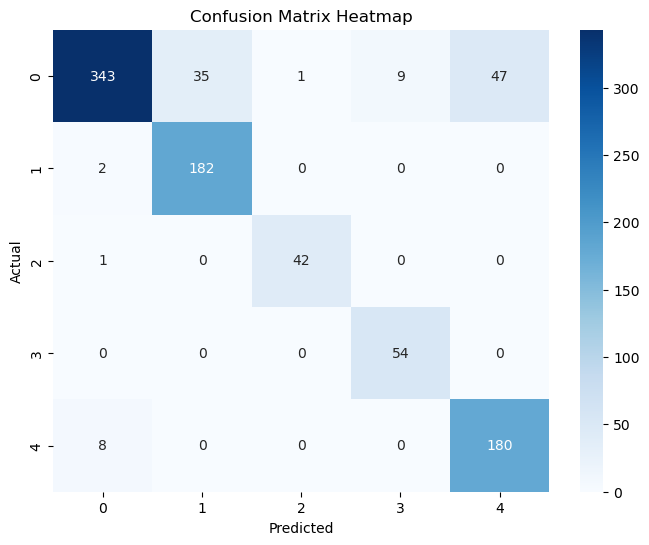

Some weights of LlamaForSequenceClassification were not initialized from the model checkpoint at meta-llama/Llama-3.2-1B and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


trainable params: 180,365,312 || all params: 1,416,189,952 || trainable%: 12.7360
('self', 'input_ids', 'attention_mask', 'inputs_embeds', 'labels', 'output_attentions', 'output_hidden_states', 'return_dict', 'task_ids', 'kwargs', 'peft_config', 'k', 'v', 'batch_size', 'prefix_attention_mask', 'prompts')


Map:   0%|          | 0/860 [00:00<?, ? examples/s]

Map:   0%|          | 0/387 [00:00<?, ? examples/s]

Map:   0%|          | 0/904 [00:00<?, ? examples/s]

Train and test on implicit
After fine tuning


/opt/conda/lib/python3.12/site-packages/accelerate/accelerator.py:494: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler(**kwargs)


Epoch,Training Loss,Validation Loss,Recall
1,1.081100,0.829536,0.548486
2,0.080200,0.293697,0.923138
3,0.068300,0.291638,0.932926



Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.93      0.93       435
           1       0.91      0.89      0.90       184
           2       0.97      0.91      0.94        43
           3       0.82      0.83      0.83        54
           4       0.95      0.96      0.95       188

    accuracy                           0.92       904
   macro avg       0.92      0.90      0.91       904
weighted avg       0.92      0.92      0.92       904


Metrics:
Balanced Accuracy: 0.9045
Accuracy: 0.9226
Precision: 0.9159
Recall: 0.9045
F1 Score: 0.9099
{0: 'actor', 1: 'film actor', 2: 'film director', 3: 'stage actor', 4: 'television actor'}


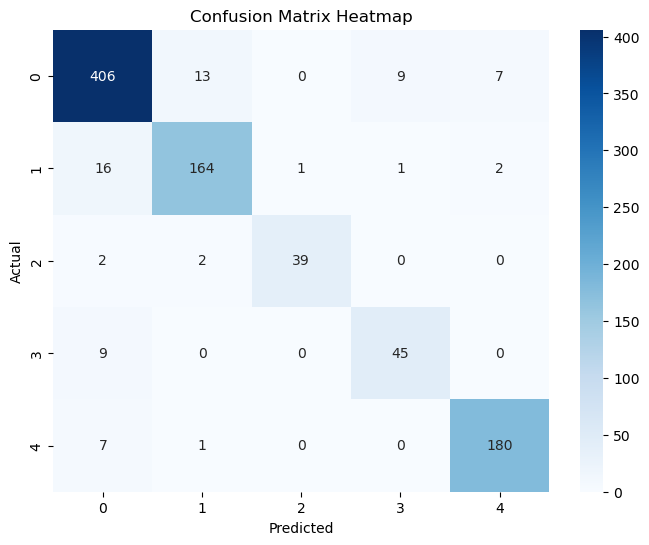

/opt/conda/lib/python3.12/site-packages/accelerate/utils/modeling.py:1462: UserWarning: Current model requires 128 bytes of buffer for offloaded layers, which seems does not fit any GPU's remaining memory. If you are experiencing a OOM later, please consider using offload_buffers=True.
  warnings.warn(
Some weights of LlamaForSequenceClassification were not initialized from the model checkpoint at meta-llama/Llama-3.2-1B and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


trainable params: 180,365,312 || all params: 1,416,189,952 || trainable%: 12.7360
('self', 'input_ids', 'attention_mask', 'inputs_embeds', 'labels', 'output_attentions', 'output_hidden_states', 'return_dict', 'task_ids', 'kwargs', 'peft_config', 'k', 'v', 'batch_size', 'prefix_attention_mask', 'prompts')
Testing trained on explicit and implicit on explicit
After fine tuning


/opt/conda/lib/python3.12/site-packages/accelerate/accelerator.py:494: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler(**kwargs)


Epoch,Training Loss,Validation Loss,Recall
1,0.350700,0.340203,0.863018
2,0.197300,0.188637,0.953034
3,0.102600,0.149292,0.966192



Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.83      0.88       435
           1       0.86      0.97      0.91       184
           2       0.98      0.98      0.98        43
           3       0.86      1.00      0.92        54
           4       0.83      0.93      0.87       188

    accuracy                           0.89       904
   macro avg       0.89      0.94      0.91       904
weighted avg       0.90      0.89      0.89       904


Metrics:
Balanced Accuracy: 0.9405
Accuracy: 0.8949
Precision: 0.8941
Recall: 0.9405
F1 Score: 0.9142
{0: 'actor', 1: 'film actor', 2: 'film director', 3: 'stage actor', 4: 'television actor'}


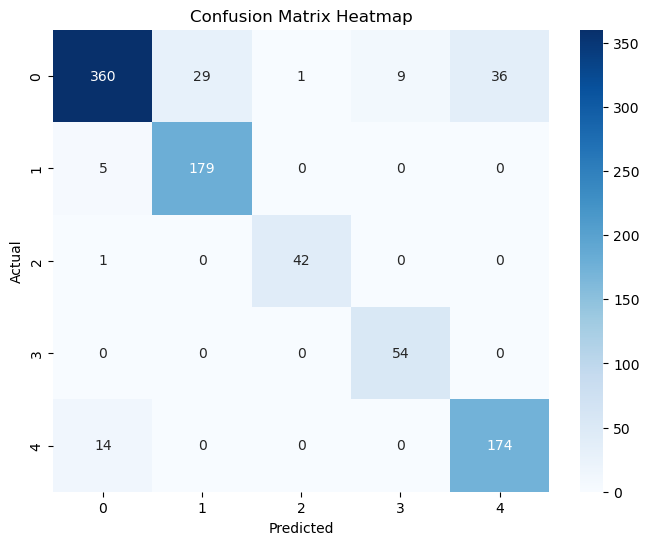

Testing trained on explicit and implicit on implicit



Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       435
           1       0.86      0.90      0.88       184
           2       0.95      0.84      0.89        43
           3       0.83      0.93      0.88        54
           4       0.95      0.97      0.96       188

    accuracy                           0.92       904
   macro avg       0.91      0.91      0.91       904
weighted avg       0.92      0.92      0.92       904


Metrics:
Balanced Accuracy: 0.9083
Accuracy: 0.9170
Precision: 0.9063
Recall: 0.9083
F1 Score: 0.9060
{0: 'actor', 1: 'film actor', 2: 'film director', 3: 'stage actor', 4: 'television actor'}


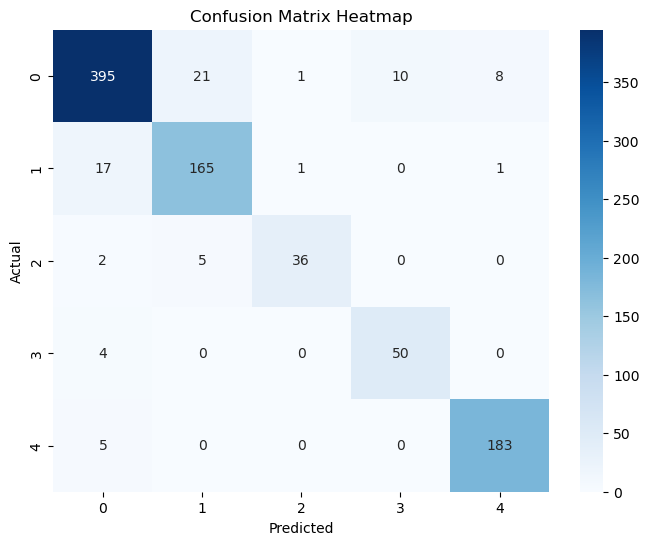

/opt/conda/lib/python3.12/site-packages/accelerate/utils/modeling.py:1462: UserWarning: Current model requires 128 bytes of buffer for offloaded layers, which seems does not fit any GPU's remaining memory. If you are experiencing a OOM later, please consider using offload_buffers=True.
  warnings.warn(
Some weights of LlamaForSequenceClassification were not initialized from the model checkpoint at meta-llama/Llama-3.2-1B and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


trainable params: 180,365,312 || all params: 1,416,189,952 || trainable%: 12.7360
('self', 'input_ids', 'attention_mask', 'inputs_embeds', 'labels', 'output_attentions', 'output_hidden_states', 'return_dict', 'task_ids', 'kwargs', 'peft_config', 'k', 'v', 'batch_size', 'prefix_attention_mask', 'prompts')
Train on explicit and test on implicit


/opt/conda/lib/python3.12/site-packages/accelerate/accelerator.py:494: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler(**kwargs)


Epoch,Training Loss,Validation Loss,Recall
1,1.312900,0.814592,0.731196
2,0.330500,0.425496,0.819933
3,0.272800,0.342525,0.925241



Classification Report:
              precision    recall  f1-score   support

           0       0.59      1.00      0.74       435
           1       1.00      0.47      0.64       184
           2       1.00      0.95      0.98        43
           3       1.00      0.30      0.46        54
           4       1.00      0.12      0.21       188

    accuracy                           0.66       904
   macro avg       0.92      0.57      0.60       904
weighted avg       0.80      0.66      0.60       904


Metrics:
Balanced Accuracy: 0.5668
Accuracy: 0.6637
Precision: 0.9177
Recall: 0.5668
F1 Score: 0.6042
{0: 'actor', 1: 'film actor', 2: 'film director', 3: 'stage actor', 4: 'television actor'}


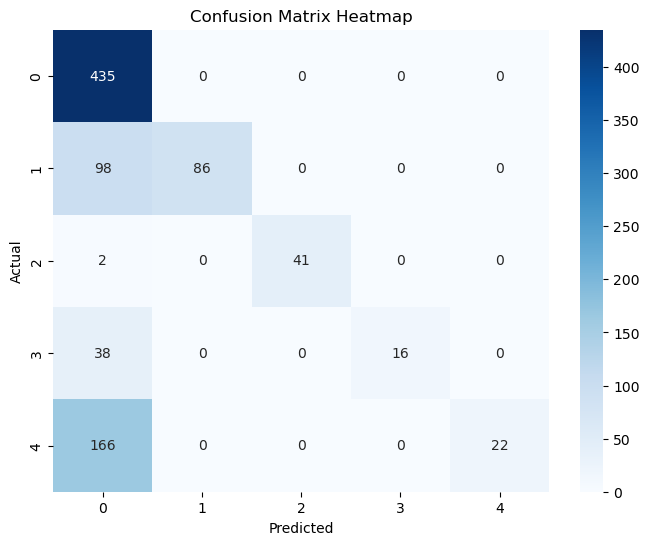

Some weights of LlamaForSequenceClassification were not initialized from the model checkpoint at meta-llama/Llama-3.2-1B and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


trainable params: 180,365,312 || all params: 1,416,189,952 || trainable%: 12.7360
('self', 'input_ids', 'attention_mask', 'inputs_embeds', 'labels', 'output_attentions', 'output_hidden_states', 'return_dict', 'task_ids', 'kwargs', 'peft_config', 'k', 'v', 'batch_size', 'prefix_attention_mask', 'prompts')
Train on implicit and test on explicit


/opt/conda/lib/python3.12/site-packages/accelerate/accelerator.py:494: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler(**kwargs)


Epoch,Training Loss,Validation Loss,Recall
1,1.081100,0.829536,0.548486
2,0.080200,0.293697,0.923138
3,0.068300,0.291638,0.932926



Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.61      0.75       435
           1       0.77      1.00      0.87       184
           2       0.98      0.93      0.95        43
           3       0.85      0.98      0.91        54
           4       0.64      1.00      0.78       188

    accuracy                           0.81       904
   macro avg       0.85      0.90      0.85       904
weighted avg       0.86      0.81      0.80       904


Metrics:
Balanced Accuracy: 0.9042
Accuracy: 0.8075
Precision: 0.8458
Recall: 0.9042
F1 Score: 0.8538
{0: 'actor', 1: 'film actor', 2: 'film director', 3: 'stage actor', 4: 'television actor'}


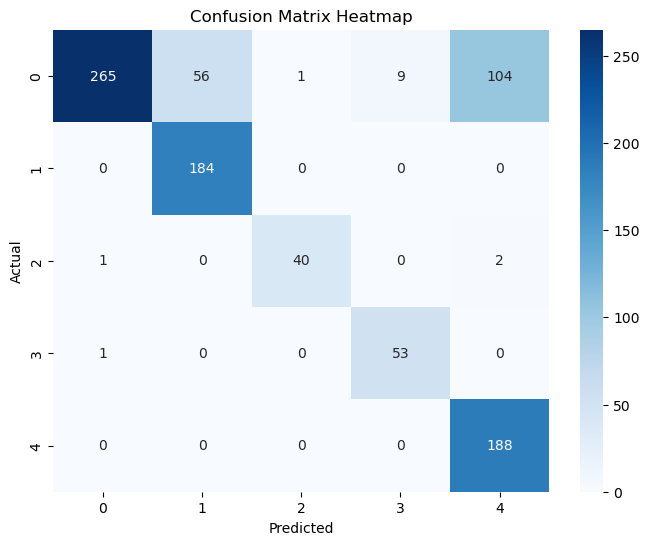

                                                Mode  Balanced Accuracy  \
0                         Train and test on explicit           0.942365   
1                         Train and test on implicit           0.904479   
2  Testing trained on explicit and implicit on ex...           0.940538   
3  Testing trained on explicit and implicit on im...           0.908265   
4             Train on explicit and test on implicit           0.566839   
5             Train on implicit and test on explicit           0.904182   

   Accuracy  Precision    Recall        F1  
0  0.886062   0.886895  0.942365  0.908895  
1  0.922566   0.915880  0.904479  0.909891  
2  0.894912   0.894081  0.940538  0.914179  
3  0.917035   0.906301  0.908265  0.905997  
4  0.663717   0.917727  0.566839  0.604190  
5  0.807522   0.845816  0.904182  0.853833  
Results saved to results_Llama-3.2-1B.csv


In [6]:
from run_experiment import run_experiment

run_experiment(model_name = "meta-llama/Llama-3.2-1B")

In [ ]:
from run_experiment import run_experiment

run_experiment(model_name = "deepseek-ai/DeepSeek-R1-Distill-Qwen-1.5B")

In [ ]:
from run_experiment import run_experiment

run_experiment(model_name = "microsoft/phi-1_5")